## EDA

- Previously we examined the various tables in the database to identify key variables, understand their relationships and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

### Importing necessary libraries

In [62]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, ScalarFormatter
import seaborn as sns
import sqlite3
import scipy.stats as stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [3]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DATA_DIR = os.path.join(BASE_DIR, 'data')
DB_PATH = os.path.join(DATA_DIR, 'company-inventory.db')

In [4]:
connection = sqlite3.connect(DB_PATH)
connection

### Fetching vendor_summary data

In [6]:
df = pd.read_sql_query("SELECT * FROM vendor_summary", connection)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [7]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorNumber           10692 non-null  int64  
 1   VendorName             10692 non-null  object 
 2   Brand                  10692 non-null  int64  
 3   Description            10692 non-null  object 
 4   PurchasePrice          10692 non-null  float64
 5   ActualPrice            10692 non-null  float64
 6   Volume                 10692 non-null  float64
 7   TotalPurchaseQuantity  10692 non-null  int64  
 8   TotalPurchaseDollars   10692 non-null  float64
 9   TotalSalesQuantity     10692 non-null  float64
 10  TotalSalesDollars      10692 non-null  float64
 11  TotalSalesPrice        10692 non-null  float64
 12  TotalExciseTax         10692 non-null  float64
 13  FreightCost            10692 non-null  float64
 14  GrossProfit            10692 non-null  float64
 15  Pr

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


### Numerical and categorical columns

In [8]:
numerical_cols = df.select_dtypes(include = np.number).columns
numerical_cols

Index(['VendorNumber', 'Brand', 'PurchasePrice', 'ActualPrice', 'Volume',
       'TotalPurchaseQuantity', 'TotalPurchaseDollars', 'TotalSalesQuantity',
       'TotalSalesDollars', 'TotalSalesPrice', 'TotalExciseTax', 'FreightCost',
       'GrossProfit', 'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [10]:
categorical_cols = df.select_dtypes(exclude = np.number).columns
categorical_cols

Index(['VendorName', 'Description'], dtype='object')

### Distribution plots for numerical columns

In [45]:
# List of numerical columns (assumed from your dataframe info)
numerical_cols = [
    'PurchasePrice', 'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
    'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
    'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
    'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'
]

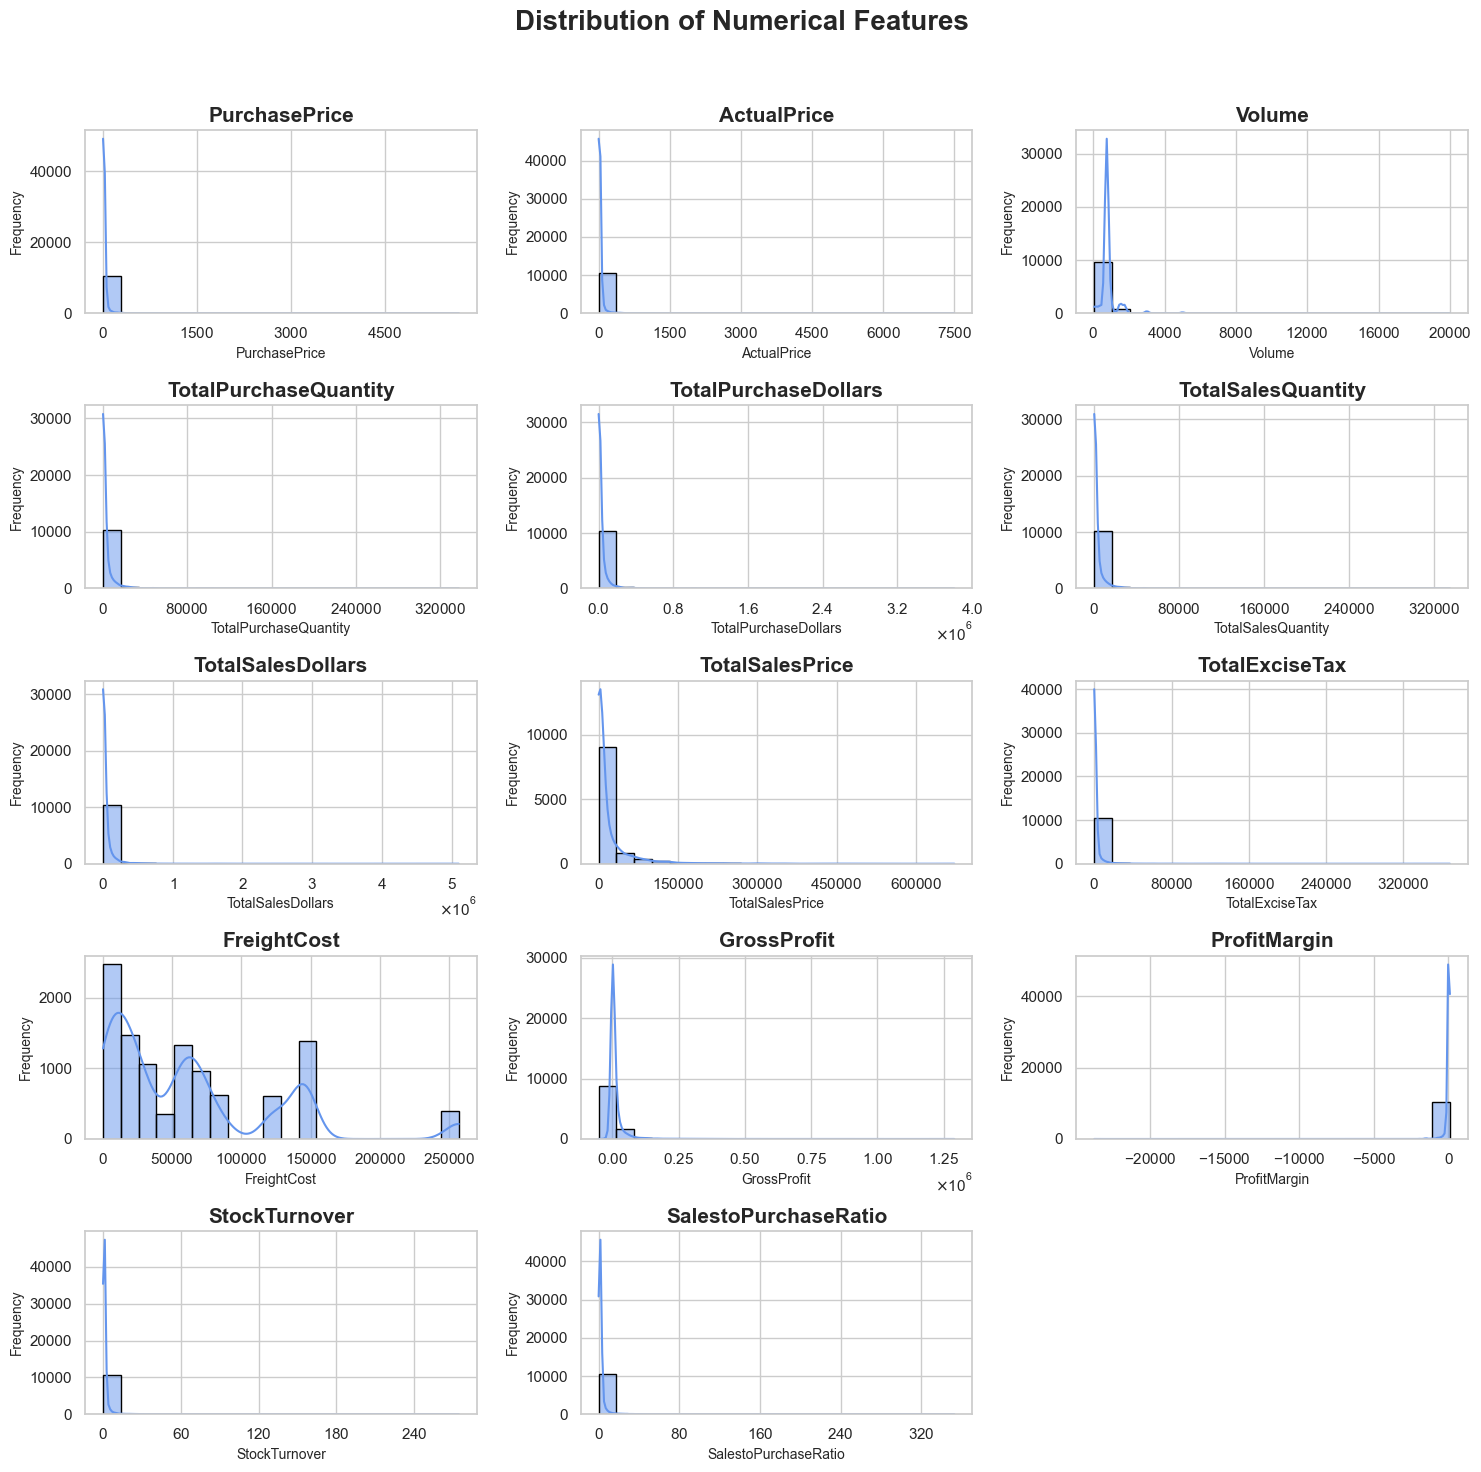

In [61]:
# Set figure size based on number of plots
n_cols = 3
n_rows = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 15), sharex = False)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df[col], kde = True, bins = 20, ax = ax,
                 color = 'cornflowerblue', edgecolor = 'black')
    ax.set_title(col, fontsize = 15, fontweight = 'bold')
    ax.set_xlabel(col, fontsize = 10)
    ax.set_ylabel('Frequency', fontsize = 10)

    # Rotate x-axis labels
    ax.tick_params(axis = 'x', rotation = 0)
    
    # Reduce number of x-ticks
    ax.xaxis.set_major_locator(MaxNLocator(nbins = 6, prune = 'both'))

    # Format x-ticks in scientific notation if large values
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText = True))

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Numerical Features', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.show()

### Boxplots

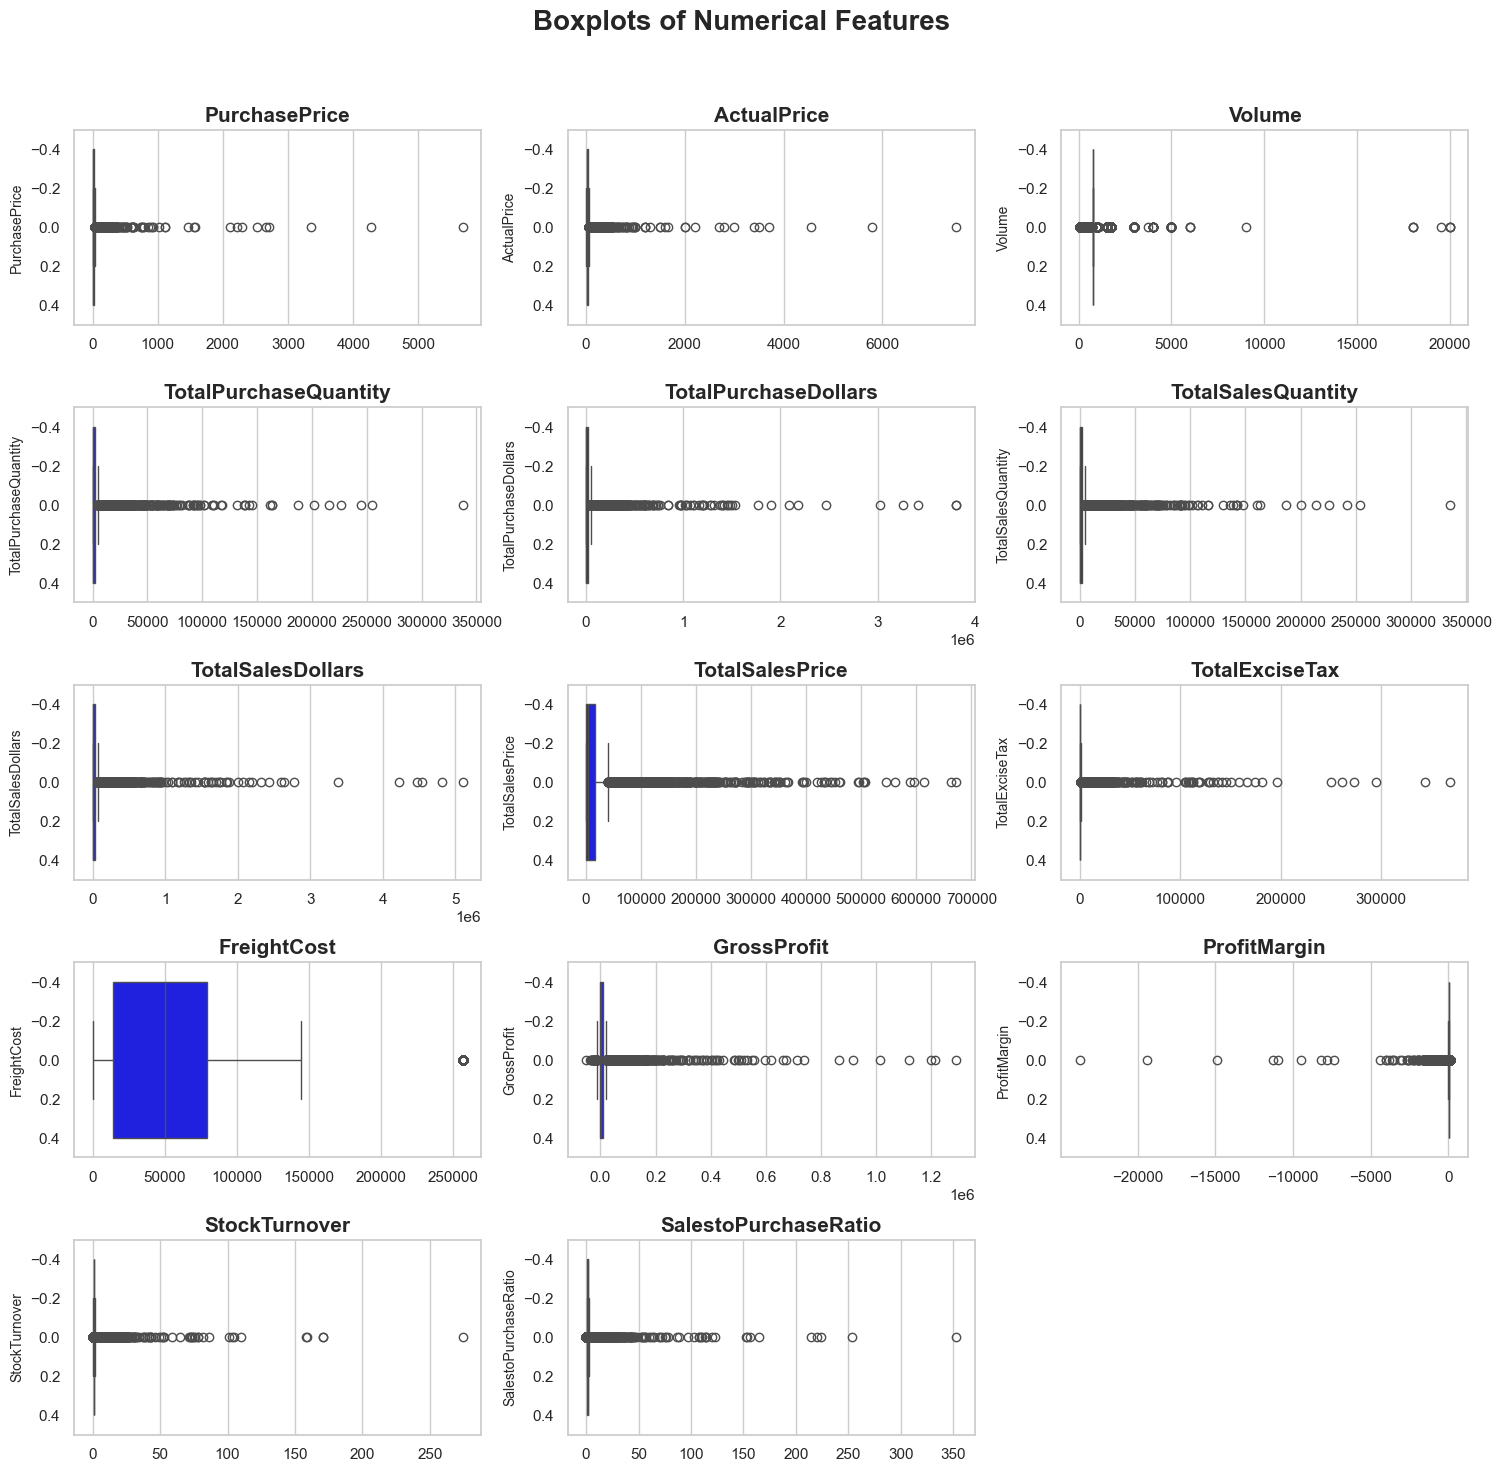

In [66]:
# Set figure size based on number of plots
n_cols = 3
n_rows = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 15), sharex = False)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(x = df[col], ax = ax, color = 'blue')
    ax.set_title(col, fontsize = 15, fontweight = 'bold')
    ax.set_xlabel('')
    ax.set_ylabel(col, fontsize = 10)

    # Format y-ticks in scientific notation if large values
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText = True))
    ax.yaxis.set_major_locator(MaxNLocator(nbins = 6, prune = 'both'))

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Boxplots of Numerical Features', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.show()

## Summary and Statistics Insights

### Negative and Zero Values:

- Gross Profit: Minimum value is -52,000.78, indicating losses. Some products or transactions may be running at a loss due to high costs or selling at discounts lower than the purchase price.
- Profit Margin: Has a minimum of -infinity, suggesting cases where revenue is zero or even lower than costs.
- Total Sales Quantity and Total Sales Dollars: Minimum values are zero, meaning some products were purchased but never sold. These could be slow moving or obsolete stock.

### Outliers indicated by high standard deviations:

- Purchase and Actual Prices: The max values (5681.81 and 7499.99) are significantly higher than the mean (24.39 and 35.64) values, indicating potential premium products.
- Freight Cost: Hugh variation, from 0.09 to 257,032.07, suggesting logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products get sold extremely fast while others take considerable amount of time and remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that products is higher than the purchase quantity, due to sales being fulfilled from older stock.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Let's filter out data by removing inconsistencies

In [67]:
df = pd.read_sql_query(
    """
    SELECT *
    FROM vendor_summary
    WHERE GrossProfit > 0
    AND ProfitMargin > 0
    AND TotalSalesQuantity > 0
    """, connection
)

df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


### Distribution plots for filtered data

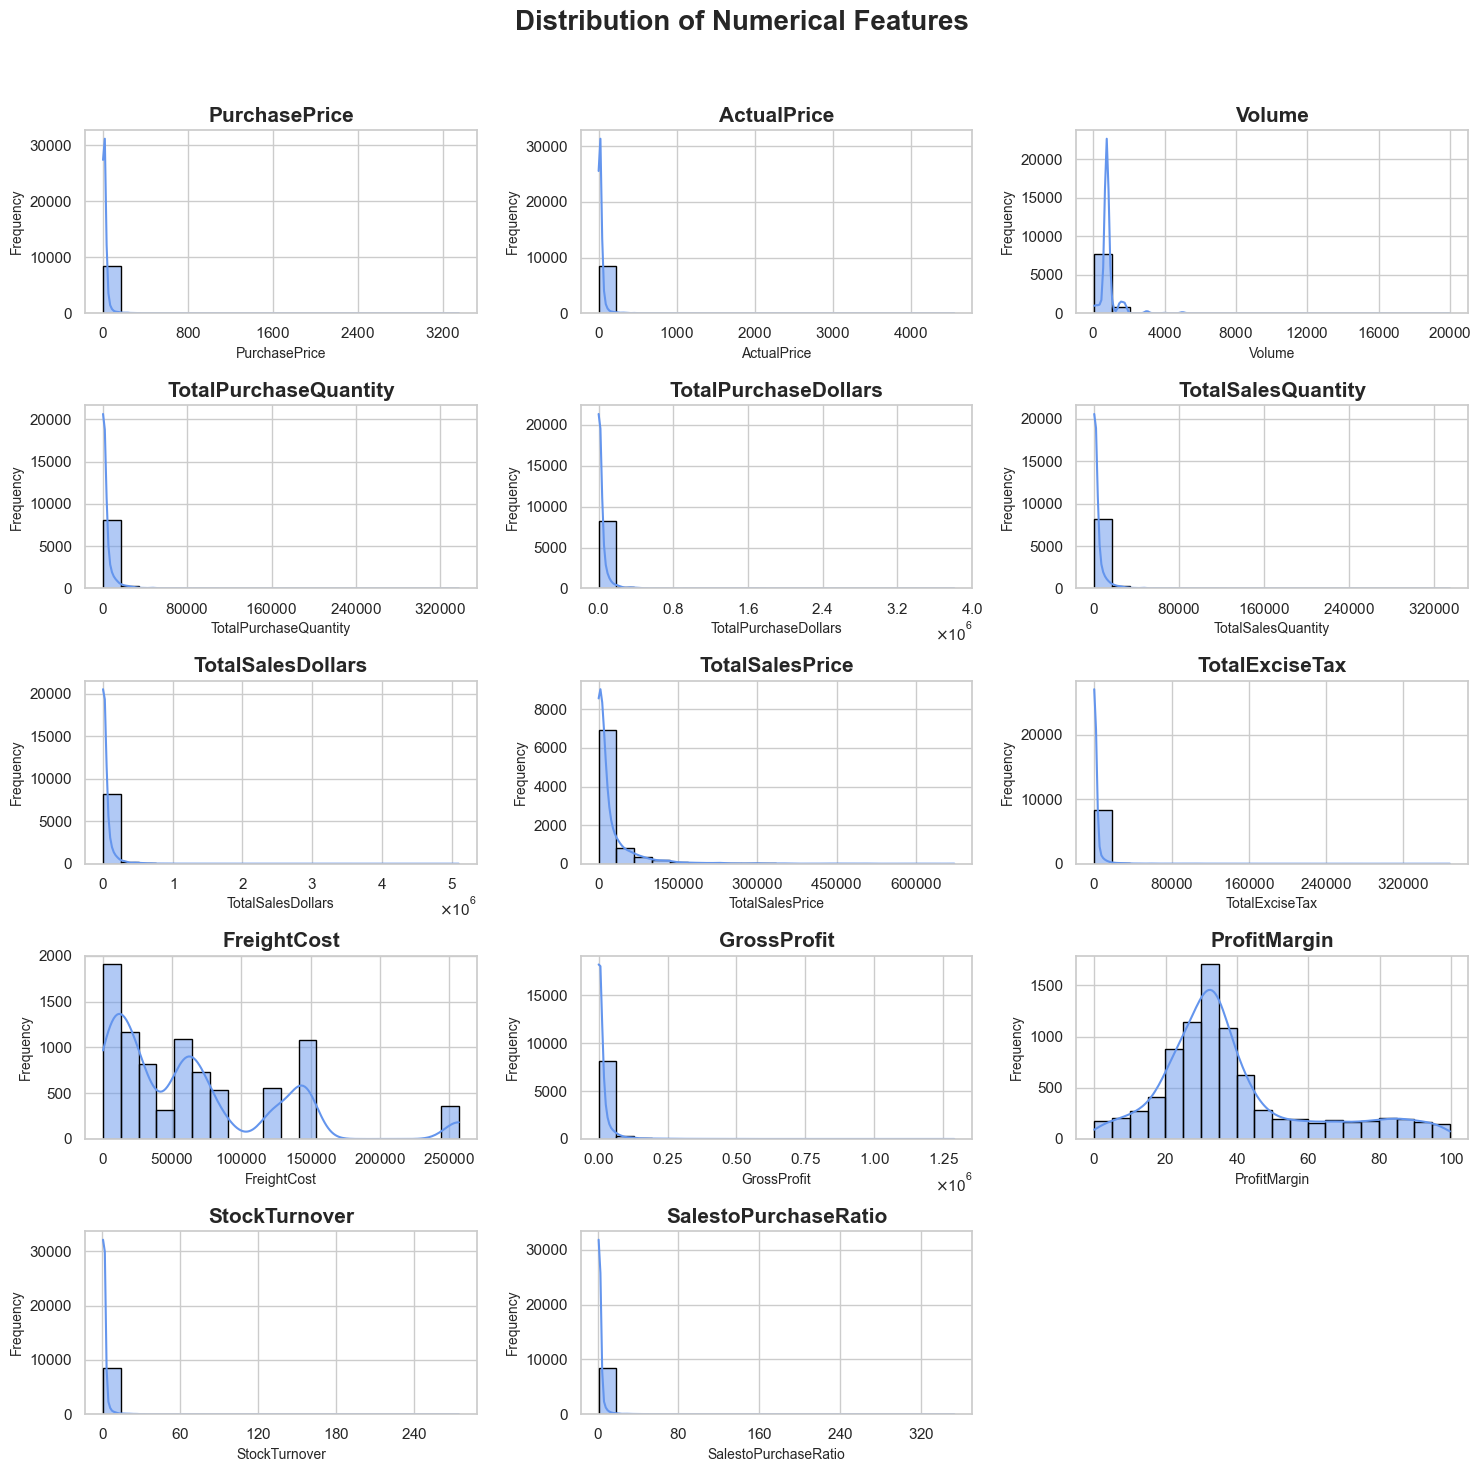

In [68]:
# Set figure size based on number of plots
n_cols = 3
n_rows = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 15), sharex = False)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df[col], kde = True, bins = 20, ax = ax,
                 color = 'cornflowerblue', edgecolor = 'black')
    ax.set_title(col, fontsize = 15, fontweight = 'bold')
    ax.set_xlabel(col, fontsize = 10)
    ax.set_ylabel('Frequency', fontsize = 10)

    # Rotate x-axis labels
    ax.tick_params(axis = 'x', rotation = 0)
    
    # Reduce number of x-ticks
    ax.xaxis.set_major_locator(MaxNLocator(nbins = 6, prune = 'both'))

    # Format x-ticks in scientific notation if large values
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText = True))

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Numerical Features', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.show()